# Simple Information Analysis of Chicken Wings

In [1]:
using Distributed
addprocs(2);

In [2]:
@everywhere begin
    using Pkg
    Pkg.activate("..")
    using Distributed, Base.Iterators    
    include("../src/binning.jl")
    include("../src/load.jl")
    include("../src/info.jl")
end

Activating environment at `~/dglmoore/yuji/Project.toml`
      From worker 3:	Activating environment at `~/dglmoore/yuji/Project.toml`
      From worker 2:	Activating environment at `~/dglmoore/yuji/Project.toml`


In [3]:
using DelimitedFiles, Plots
include("../src/analysis.jl")

analyze (generic function with 1 method)

In [4]:
fs = frames("../videos/Before2-MPGC.mov")[57:456, 61:460, :];

In [5]:
g = green(fs);

In [6]:
greengrid = rescale(coarse(g, 10, 10));

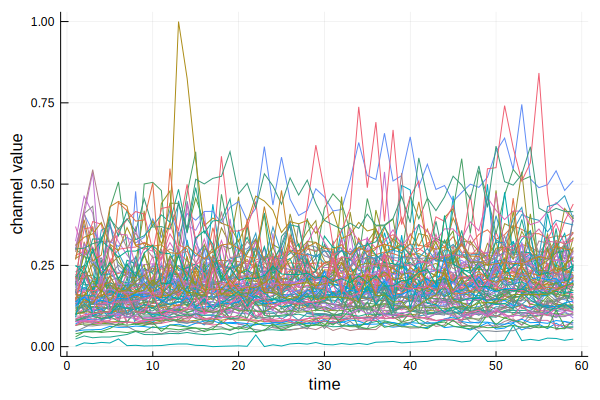

In [7]:
if haskey(ENV, "GKS_WSTYPE")
    delete!(ENV, "GKS_WSTYPE")
end
p = plot(xlabel="time", ylabel="channel value", legend=false)
for i in 1:size(greengrid, 1), j in 1:size(greengrid, 2)
    plot!(p, greengrid[i,j,:])
end
p

In [12]:
@time greenmi = analyze(greengrid; nperms=1000);

137.298916 seconds (5.55 k allocations: 2.281 MiB)


┌ Info: Saved animation to 
│   fn = /home/ec2-user/dglmoore/yuji/notebooks/tmp.gif
└ @ Plots /home/ec2-user/.julia/packages/Plots/2KhB2/src/animation.jl:98


Plots.AnimatedGif("/home/ec2-user/dglmoore/yuji/notebooks/tmp.gif")
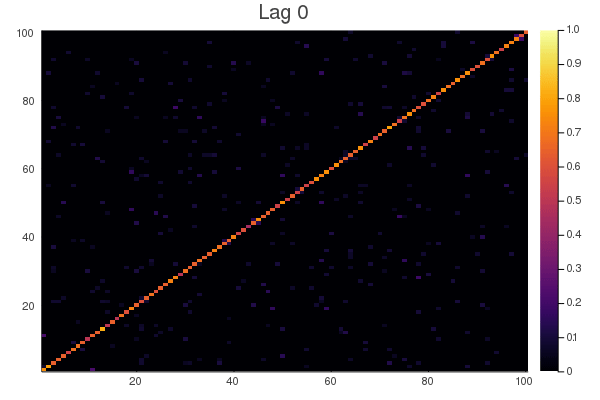

In [13]:
anim = @animate for (l, mi) in enumerate(greenmi)
    heatmap(linearize(mi), title="Lag $(l-1)", clim=(0, 1))
end
gif(anim; fps=0.5)

In [10]:
writedlm("info.txt", hcat(linearize.(greenmi)...))